# Simulador Solar

- Nombre: Victor muñoz
- Fecha: 06-01-2022

In [11]:
# Librerias utiles
import pvlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pvlib import location
#from pvlib import irradiance
from datetime import datetime

%matplotlib inline

#from pvlib.pvsystem import PVSystem, FixedMount
#from pvlib.location import Location
#from pvlib.modelchain import ModelChain
#from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

# funciones
import funciones

## 1) Extraccion datos del clima desde solcast

In [2]:
# falta leer la libreria

## 2) Datos reales

In [105]:
nombre_excel_planta_01 = 'Generación MWh plantas solar.xlsx'
nombre_excel_planta_02 = 'multi por 1,2.xlsx'

In [106]:
#pmgd_planta_01 = pd.read_excel(nombre_excel_planta_01)
#pmgd_planta_02 = pd.read_excel(nombre_excel_planta_02)

# pmgd_data_keys_central = np.unique(np.array(pmgd_data['Central']))
# pmgd_data_keys_central = [key for key in pmgd_data_keys_central if key.startswith('PMGD PFV')] 
# print(pmgd_data_keys_central) 


In [107]:
#pmgd_planta_01.to_pickle("Generación MWh plantas solar") #solo se hace para guardar
#pmgd_planta_02.to_pickle("multi por 1,2.xlsx")
df = pd.read_pickle("Generación MWh plantas solar")
df2 = pd.read_pickle("multi por 1,2.xlsx")
#df

In [108]:
potencia_instalada = '3000' # no se ha ocupado aún
nombre_key_pmgd = 'PMGD PFV VALLE DE LA LUNA II'


In [111]:
# datos planta solar
pmgd_planta_01 = df
pmgd_planta_02 = df2

pmgd_subdf = pmgd_planta_01.loc[pmgd_planta_01['Central'] == nombre_key_pmgd]
pmgd_subdf2 = pmgd_planta_02.loc[pmgd_planta_02['Central'] == nombre_key_pmgd]
#filtrar datos diarios por un año
def filter_day_year(year, data):
    filter_data = data[['Fecha', 'año', 'Total']]
    filter_data = filter_data.loc[filter_data['año'] == year]
    #filter_data = filter_data.set_index('Fecha')
    filter_data = filter_data[['Fecha','Total']]
    return filter_data
# data es "una serie de tiempo" 
data = filter_day_year(2020, pmgd_subdf) 
data2 = filter_day_year(2020, pmgd_subdf2) 

#data.to_pickle("PMGD PFV VALLE DE LA LUNA II") #solo se hace para guardar 
#data2.to_pickle("multi por 1,2") #solo se hace para guardar 

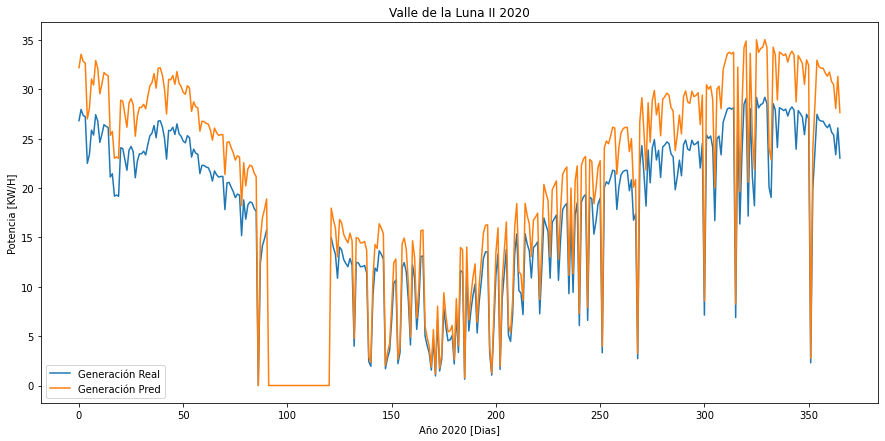

In [112]:
plt.figure(figsize=(15,7))
plt.plot(range(len(data2)),data['Total'],label='Generación Real')
plt.plot(range(len(data2)),data2['Total'],label='Generación Pred')
plt.xlabel('Año 2020 [Dias]')
plt.ylabel('Potencia [KW/H]')
plt.legend()
plt.title("Valle de la Luna II 2020")
plt.savefig('comparacion.png')
plt.show()


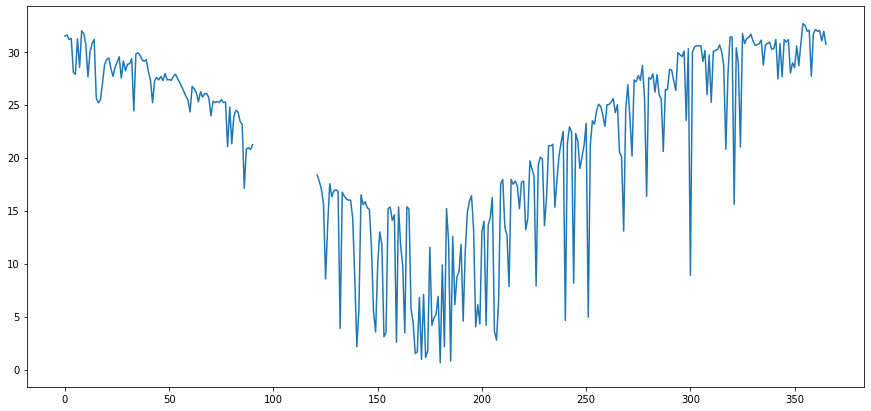

In [118]:
df3 = pd.read_pickle("Generación MWh plantas solar")
nombre_key_pmgd3 = 'PMGD PFV SANTUARIO SOLAR'
pmgd_subdf3 = df3.loc[df3['Central'] == nombre_key_pmgd3]

data3 = filter_day_year(2020, pmgd_subdf3) 
plt.figure(figsize=(15,7))
plt.plot(range(len(data3)),data3['Total'],label='Generación Real')
plt.show()


In [119]:
print(data3.iloc[91])
print(data3.iloc[120])

Fecha    2020-04-01
Total           NaN
Name: 498505, dtype: object
Fecha    2020-04-30
Total           NaN
Name: 498534, dtype: object


## 3) Datos simulados

## 3.1) Buscar inversores y modulos

In [12]:
textos_modulos = ['JA_Solar','325',''] # tienen que ser 3 textos
textos_inversores = ['SMA_America','720',''] # tiene que ser 3 textos
c = funciones.buscador(textos_inversores,textos_modulos)

for a in c:
    print(a,": ",c[a],"\n")

modulos_cec :  ['JA_Solar_Holding_JAP6_72_325_4BB', 'JA_Solar_Holdings_JAM6_k__72_325_4BB', 'JA_Solar_Holdings_JAP6_72_325_4BB', 'JA_Solar_Holdings_JAP6_72_325_4BB_RE', 'Shanghai_JA_Solar_Technology_JAM6_72_325_SI', 'Shanghai_JA_Solar_Technology_JAP6_72_325_3BB'] 

modulos_sandia :  [] 

inversores_cec :  ['SMA_America__SC720CP_US__with_ABB_EcoDry_Ultra_transformer___N_A_V__CEC_2018_', 'SMA_America__SC720CP_US_324V__CEC_2012_'] 

inversores_sandia :  ['SMA_America__SC720CP_US__with_ABB_EcoDry_Ultra_transformer___N_A_V__CEC_2018_', 'SMA_America__SC720CP_US_324V__CEC_2012_'] 



## 3.2) Seleccionar inversores y modulos

In [121]:
modulo = pvlib.pvsystem.retrieve_sam('cecmod').JA_Solar_JAP72S01_325_SC
inversores = {'a' :pvlib.pvsystem.retrieve_sam('cecinverter').SMA_America__SC720CP_US__with_ABB_EcoDry_Ultra_transformer_,
             'b': pvlib.pvsystem.retrieve_sam('cecinverter').SMA_America__SC720CP_US__with_ABB_EcoDry_Ultra_transformer_
             }


In [122]:
modulo

Technology           Multi-c-Si
Bifacial                      0
STC                    324.9191
PTC                       300.1
A_c                        1.88
Length                      NaN
Width                       NaN
N_s                          72
I_sc_ref                   9.17
V_oc_ref                  46.38
I_mp_ref                   8.69
V_mp_ref                  37.39
alpha_sc               0.004126
beta_oc               -0.140531
T_NOCT                     44.5
a_ref                  1.780158
I_L_ref                9.172333
I_o_ref                     0.0
R_s                    0.420985
R_sh_ref            1655.077515
Adjust                 1.666951
gamma_r                  -0.387
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: JA_Solar_JAP72S01_325_SC, dtype: object

In [123]:
inversores['a']
#inversores['b']

Vac                            0
Pso                  2602.881592
Paco                    742000.0
Pdco                    763509.5
Vdco                       592.0
C0                          -0.0
C1                      0.000017
C2                      0.002165
C3                      0.000719
Pnt                        222.6
Vdcmax                     820.0
Idcmax               1289.711993
Mppt_low                   515.0
Mppt_high                  820.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: SMA_America__SC720CP_US__with_ABB_EcoDry_Ultra_transformer_, dtype: object

## 3.3) Extraer data meteorologica desde solcast

In [124]:
rutafile = '-25.406494_-70.480303_Solcast_PT60M.csv'
solcast = pd.read_csv(rutafile,
                      header=0,
                      names=['utc_time', 'DateStart', 'Periodo', 'temp_air', 'Opacidad_nube', 'dhi', 'dni','ghi','relative_humidity','wind_speed']
                     )
weather= solcast.copy()
format = '%Y-%m-%d %H:%M:%S'
solcast['utc_time'] = pd.to_datetime(solcast['utc_time'],infer_datetime_format=True)
solcast = solcast.set_index(pd.DatetimeIndex(solcast['utc_time']))
solcast = solcast.drop(['utc_time'], axis=1)

In [125]:
print(solcast)


                                DateStart Periodo  temp_air  Opacidad_nube  \
utc_time                                                                     
2019-12-31 02:00:00  2019-12-31T01:00:00Z   PT60M      15.1            0.0   
2019-12-31 03:00:00  2019-12-31T02:00:00Z   PT60M      14.7            0.0   
2019-12-31 04:00:00  2019-12-31T03:00:00Z   PT60M      14.5            0.0   
2019-12-31 05:00:00  2019-12-31T04:00:00Z   PT60M      14.3            0.0   
2019-12-31 06:00:00  2019-12-31T05:00:00Z   PT60M      14.4            0.0   
...                                   ...     ...       ...            ...   
2021-01-01 18:00:00  2021-01-01T17:00:00Z   PT60M      18.7            0.0   
2021-01-01 19:00:00  2021-01-01T18:00:00Z   PT60M      18.7            0.0   
2021-01-01 20:00:00  2021-01-01T19:00:00Z   PT60M      18.8            0.0   
2021-01-01 21:00:00  2021-01-01T20:00:00Z   PT60M      18.9            0.0   
2021-01-01 22:00:00  2021-01-01T21:00:00Z   PT60M      18.8     

## 3.4) Seleccion de parametros de entrada de la planta

In [126]:
# objeto location
Longitude = -70.4803
Latitude = -25.4065
Altitude=  46
Tz = 'America/Santiago'
locacion = Location(latitude=Latitude,longitude=Longitude,tz=Tz, altitude=Altitude)

In [127]:
# objetos system
azimuth = 180
tilt = 10
modulos_por_strings = 70
strings_por_inversor = 72
temperature_model_parameters= TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
sistemas = {'a' :PVSystem(module_parameters=modulo,
                          inverter_parameters=inversores['a'],
                          surface_azimuth=azimuth,
                          surface_tilt=tilt,
                          modules_per_string=modulos_por_strings,
                          strings_per_inverter=strings_por_inversor,
                          temperature_model_parameters=temperature_model_parameters
                         ),
           'b' :PVSystem(module_parameters=modulo,
                          inverter_parameters=inversores['b'],
                          surface_azimuth=azimuth,
                          surface_tilt=tilt,
                          modules_per_string=modulos_por_strings,
                          strings_per_inverter=strings_por_inversor,
                          temperature_model_parameters=temperature_model_parameters
                        ) 
           }

In [128]:
ModelChain?

In [129]:
# objetos ModelChain
modelo_aoi = 'physical'
modelo_spectral = 'no_loss'
modelo_dc = 'none'
modelo_ac = 'none'
modelo_temperatura = 'pvsyst'
modelo_losses = 'pvwatts'
names = {'a': 'system_a','b':'system_b'}


modelos = {'a': ModelChain(system=sistemas['a'],
                          location=locacion,
                          aoi_model=modelo_aoi,
                          spectral_model=modelo_spectral,
                          dc_model=modelo_dc,
                          ac_model=modelo_ac,
                          temperature_model=modelo_temperatura,
                          losses_model=modelo_losses,
                          name=names['a']
                         ),
          'b': ModelChain(system=sistemas['b'],
                          location=locacion,
                          aoi_model=modelo_aoi,
                          spectral_model=modelo_spectral,
                          dc_model=modelo_dc,
                          ac_model=modelo_ac,
                          temperature_model=modelo_temperatura,
                          losses_model=modelo_losses,
                          name=names['b']
                         )}

ValueError: none is not a valid DC power model

In [2]:
times = pd.date_range(start=solcast.iloc[0].name,end=solcast.iloc[-1].name,freq='1h', tz=locacion.tz)
print(times)
weather = solcast.copy()
weather =weather.reset_index()
weather['date'] = times
weather = weather.set_index(pd.DatetimeIndex(weather['date']))
weather = pd.DataFrame(weather[['ghi','dni','dhi','temp_air', 'wind_speed']])
print(weather)

# ejecutar modelos
for i in modelos:
    modelos[i].run_model(weather=weather)

NameError: name 'solcast' is not defined

In [ ]:
# coordenadas de las plantas solares
coordenadas = [(-25.4065, -70.4803, 'Tal-Tal', 46, 'America/santiago')]

parametros_temperatura_modelo = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

clima = solcast.copy()
clima = clima[['temp_air','relative_humidity','ghi','dni','dhi','wind_speed']]

system = {'module': modulo, 'inverter': inversor,'surface_azimuth': 180}

energias = {}

for location, weather in zip(coordenadas, clima):
    latitude, longitude, name, altitude, timezone = location
    system['surface_tilt'] = latitude
    solpos = pvlib.solarposition.get_solarposition(
        time=weather.index,
        latitude=latitude,
        longitude=longitude,
        altitude=altitude,
        temperature=weather,
        pressure=pvlib.atmosphere.alt2pres(altitude),
    )
    dni_extra = pvlib.irradiance.get_extra_radiation(weather.index)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
    aoi = pvlib.irradiance.aoi(
        system['surface_tilt'],
        system['surface_azimuth'],
        solpos["apparent_zenith"],
        solpos["azimuth"],
    )
    total_irradiance = pvlib.irradiance.get_total_irradiance(
        system['surface_tilt'],
        system['surface_azimuth'],
        solpos['apparent_zenith'],
        solpos['azimuth'],
        weather['dni'],
        weather['ghi'],
        weather['dhi'],
        dni_extra=dni_extra,
        model='haydavies',
    )
    cell_temperature = pvlib.temperature.sapm_cell(
        total_irradiance['poa_global'],
        weather["temp_air"],
        weather["wind_speed"],
        **temperature_model_parameters,
    )
    effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(
        total_irradiance['poa_direct'],
        total_irradiance['poa_diffuse'],
        am_abs,
        aoi,
        module,
    )
    dc = pvlib.pvsystem.sapm(effective_irradiance, cell_temperature, module)
    ac = pvlib.inverter.sandia(dc['v_mp'], dc['p_mp'], inverter)
    annual_energy = ac.sum()
    energies[name] = annual_energy


energies = pd.Series(energies)
print(energies)
energies.plot(kind='bar', rot=0)
plt.ylabel('Yearly energy yield (W hr)')



In [ ]:
coordinates = [
    (32.2, -111.0, 'Tucson', 700, 'Etc/GMT+7'),
    (35.1, -106.6, 'Albuquerque', 1500, 'Etc/GMT+7'),
    (37.8, -122.4, 'San Francisco', 10, 'Etc/GMT+8'),
    (52.5, 13.4, 'Berlin', 34, 'Etc/GMT-1'),
]

tmys = []

for location in coordinates:
    latitude, longitude, name, altitude, timezone = location
    weather = pvlib.iotools.get_pvgis_tmy(latitude, longitude,
                                          map_variables=True)[0]
    weather.index.name = "utc_time"
    tmys.append(weather)

In [ ]:
print(tmys)

In [ ]:
tz = -0.5
lat, lon = -25.4065, -70.4803
site = location.Location(lat, lon, tz=tz)

def get_irradiance(site_location, tilt, surface_azimuth):
    
    times = pd.DatetimeIndex(solcast["PeriodStart"], freq='60T')
    #clearsky = site_location.get_clearsky(times)
    solar_position = site_location.get_solarposition(times=times)
    
    
    # Use the get_total_irradiance function to transpose the GHI to POA
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        #pd.concat([solcast["PeriodStart"],solcast['Dni']], axis=1,).set_index('PeriodStart')
        dni=solcast['Dni'],
        ghi=solcast['Ghi'],
        dhi=solcast['Dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    print(POA_irradiance)
    # Return DataFrame with only GHI and POA
    return pd.DataFrame({'GHI': solcast['Ghi'],'POA': POA_irradiance['poa_global']})

In [ ]:
solcast_poa = get_irradiance(site,25,180)


In [ ]:
d = {k: modulo[k] for k in ['a_ref', 'I_L_ref', 'I_o_ref', 'R_sh_ref', 'R_s']}
photocurrent, saturation_current, resistance_series, resistance_shunt, nNsVth = (pvlib.pvsystem.calcparams_desoto(solcast_poa['POA'],
                                                                                                                  solcast['AirTemp'],
                                                                                                                  modulo['alpha_sc'],
                                                                                                                  EgRef= 1.121,
                                                                                                                  dEgdT=-0.0002677, **d))
#single_diode_out = pvlib.pvsystem.singlediode(photocurrent, saturation_current, resistance_series, resistance_shunt, nNsVth)
                                                                                                                  

In [ ]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
temperature_model_parameters

In [ ]:
# definicion de como se monto el panel
parametros_temperatura_modulo = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# ubicación
lat, lon = -25.4065, -70.4803
tz='America/Santiago'
alt=46
name_location = 'Tal-Tal'
location = Location(latitude=lat, longitude=lon, tz=tz, altitude=alt, name=name_location)
print(location)

# calculo de azimuth
times = pd.DatetimeIndex(solcast["PeriodStart"], freq='60T')
solar_position = location.get_solarposition(times=times)
#print(solar_position)
#print(solar_position['azimuth'].iloc[0])
#print(solcast["PeriodStart"].iloc[0])

# infomacion de los modulos (paneles solares) e inversores
tilt = 20  # inclinacion
azimuth = 200 # solar_position['azimuth'].iloc[0]  angulo entre el norte y el sol  
racking_model = 'open_rack' 
module_type = 'glass_glass'
module = 'JA_Solar_JAP72S01_325_SC'
name_system = 'PMGD PFV VALLE DE LA LUNA II'
modules_per_string = 70
strings_per_inverter = 72
name_inverter='SMA_America__SC720CP_US__with_ABB_EcoDry_Ultra_transformer_'

system = PVSystem(name=name_system,
                  surface_tilt=tilt,
                  surface_azimuth=azimuth,
                  racking_model=racking_model,
                  module=module,
                  module_type=module_type,
                  module_parameters=modulo,
                  modules_per_string=modules_per_string,
                  inverter_parameters=inversor,
                  inverter=name_inverter,
                  strings_per_inverter=strings_per_inverter,
                  temperature_model_parameters=parametros_temperatura_modulo)

print(system)

# modelo de cadena
mc = ModelChain(system,location,aoi_model='no_loss')

# creamos data del clima
clima = solcast.copy()
clima.columns = ['FechaFin', 'date', 'Periodo', 'temp_air', 'Opacidad_nube', 'dhi', 'dni','ghi','precipitable_water','wind_speed']
weather = clima[['date','dni','ghi','dhi','wind_speed','temp_air','precipitable_water']]

# ejecutar el modelo
mc.run_model(weather)



## 4) Comparación datos reales V/S simulados

In [ ]:
import pvlib

import pandas as pd

import matplotlib.pyplot as plt


coordinates = [
    (32.2, -111.0, 'Tucson', 700, 'Etc/GMT+7'),
    (35.1, -106.6, 'Albuquerque', 1500, 'Etc/GMT+7'),
    (37.8, -122.4, 'San Francisco', 10, 'Etc/GMT+8'),
    (52.5, 13.4, 'Berlin', 34, 'Etc/GMT-1'),
]



sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')

sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [ ]:
tmys = []

for location in coordinates:
    latitude, longitude, name, altitude, timezone = location
    weather = pvlib.iotools.get_pvgis_tmy(latitude, longitude,
                                          map_variables=True)[0]
    weather.index.name = "utc_time"
    tmys.append(weather)



In [ ]:
system = {'module': module, 'inverter': inverter,
          'surface_azimuth': 180}


energies = {}

for location, weather in zip(coordinates, tmys):
    latitude, longitude, name, altitude, timezone = location
    system['surface_tilt'] = latitude
    solpos = pvlib.solarposition.get_solarposition(
        time=weather.index,
        latitude=latitude,
        longitude=longitude,
        altitude=altitude,
        temperature=weather["temp_air"],
        pressure=pvlib.atmosphere.alt2pres(altitude),
    )
    dni_extra = pvlib.irradiance.get_extra_radiation(weather.index)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
    aoi = pvlib.irradiance.aoi(
        system['surface_tilt'],
        system['surface_azimuth'],
        solpos["apparent_zenith"],
        solpos["azimuth"],
    )
    total_irradiance = pvlib.irradiance.get_total_irradiance(
        system['surface_tilt'],
        system['surface_azimuth'],
        solpos['apparent_zenith'],
        solpos['azimuth'],
        weather['dni'],
        weather['ghi'],
        weather['dhi'],
        dni_extra=dni_extra,
        model='haydavies',
    )
    cell_temperature = pvlib.temperature.sapm_cell(
        total_irradiance['poa_global'],
        weather["temp_air"],
        weather["wind_speed"],
        **temperature_model_parameters,
    )
    effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(
        total_irradiance['poa_direct'],
        total_irradiance['poa_diffuse'],
        am_abs,
        aoi,
        module,
    )
    dc = pvlib.pvsystem.sapm(effective_irradiance, cell_temperature, module)
    ac = pvlib.inverter.sandia(dc['v_mp'], dc['p_mp'], inverter)
    annual_energy = ac.sum()
    energies[name] = annual_energy


energies = pd.Series(energies)


print(energies)






energies.plot(kind='bar', rot=0)


plt.ylabel('Yearly energy yield (W hr)')